# Daten visualiseren

In [10]:
import pandas
d = pandas.read_csv('car.csv', sep='\t', parse_dates=['Datum'])
fuel_only = d[d["Typ"] == "Benzin"]

## Alles auf einmal
Mittels `plot()` werden alle Zahlenspalten in einer Grafik dargestellt.

**Hinweis:** auf https://jupyter.org/try-jupyter/lab/ wird nur dann eine Grafik angzeigt wenn man explizit `show()`aus `matplotlib.pyplot` aufruft.

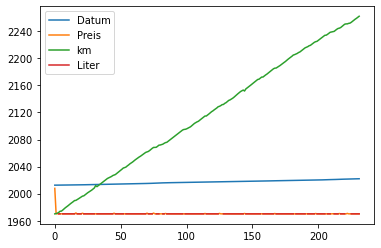

In [11]:
import matplotlib.pyplot as plt

d.plot();
plt.show()

Das ist in diesem Fall nicht besonders hilfreich weil jede Spalte eine andere Bedeutung hat.
Bei Messwerten, bei dem jede Spalte ein anderes Experiment ist könnte dies aber nützlich sein.

## Zwei Spalten als X-Y-Koordinaten darstellen

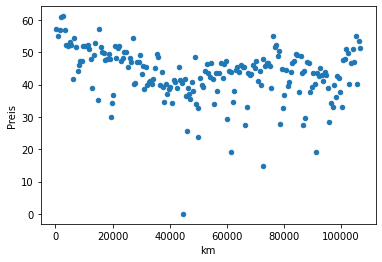

In [12]:
fuel_only.plot(kind="scatter", x="km", y="Preis");
plt.show()

Das sieht schon besser aus. Allerdings sind die Zahlen nicht wirklich vergleichbar. Besser wäre, den Preis / l darzustellen. Den müssen wir aber erst berechnen.

In [13]:
ppl = fuel_only["Preis"] / fuel_only["Liter"]

Jetzt haben wir eine Spalte `ppl` (Preis pro l) und die Tabelle `fuel_with_ppl`.
Die Spalte `ppl` soll aber in die Tabelle eingefügt werden. Dazu benötigt sie zuerst einmal einen Namen.

In [14]:
ppl_with_name = ppl.rename("Preis_pro_l")

`rename()` benennt aber `ppl` nicht einfach um sondern erzeugt eine neue Spalte die den Namen enthält.
Diese kann kann mit der Tabelle vereinigt werden wobei wiederum eine neue Tabelle entsteht.

In [15]:
fuel_with_ppl = fuel_only.join(ppl_with_name)

Diese drei Befehle kann man auch in einem Zusammenfassen. Damit spart man sich neue Variablennamen.

In [16]:
fuel_with_ppl = fuel_only.join((fuel_only["Preis"] / fuel_only["Liter"]).rename("Preis_pro_l"))
fuel_with_ppl.head(2)

Datum     Typ Beschreibung  Preis   km  Liter  Preis_pro_l
1 2012-07-10  Benzin         ESSO  57.01  199  34.89     1.633993
3 2012-07-23  Benzin     Kaufland  55.03  828  34.20     1.609064

Damit können wir jetzt die Treibstoffkosten in Abhängigkeit vom km-Stand darstellen.

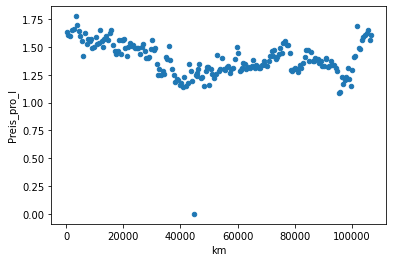

In [17]:
fuel_with_ppl.plot(kind="scatter", x="km", y="Preis_pro_l");
plt.show()

Interessant ist jetz noch der Verbrauch des Fahrzeugs, d.h. wieviele Liter pro 100 km es verbraucht hat.
Dazu muss man die Differenz zwischen jeweils zwei km-Ständen berechnen.
Dies geschieht mit der Funktion `diff()` die man auf eine Spalte der Daten anwendet.

## Aufgabe
1. Was macht die Funktion `diff()` genau?
1. Bei welchen Daten kann man die noch verwenden?

## Lösung
Schauen wir uns das mal genauer an. Zuerst die Daten

In [18]:
fuel_with_ppl["km"].head(5)

1     199
3     828
4    1444
6    2061
7    2710
Name: km, dtype: int64

In [19]:
fuel_with_ppl["km"].diff().head(5)

1      NaN
3    629.0
4    616.0
6    617.0
7    649.0
Name: km, dtype: float64

`diff()` berechnet die Differnz von zwei aufeinanderfolgenden Zeilen.
Den Abstand kann man aber auch selbst festlegen. Möchte man die Differenz von jeweils den übernächsten Zeilen muss man den Parameter `periods` verwenden.

In [20]:
fuel_with_ppl["km"].diff(periods=2).head(5)

1       NaN
3       NaN
4    1245.0
6    1233.0
7    1266.0
Name: km, dtype: float64

## Weiter mit der Verbrauchsberechung
Wir erzeugen jetzt eine neue **Series** in unserem **Data Frame** die gefahrenen km zwischen zwei Tankstopps enthält.
Mit der Funktion `diff()` geht das ohne Umwege:

In [21]:
fuel_with_ppl["km_driven"] = fuel_with_ppl["km"].diff()
fuel_with_ppl.head(2)

Datum     Typ Beschreibung  Preis   km  Liter  Preis_pro_l  km_driven
1 2012-07-10  Benzin         ESSO  57.01  199  34.89     1.633993        NaN
3 2012-07-23  Benzin     Kaufland  55.03  828  34.20     1.609064      629.0

Nun können wir den Verbrauch berechnen ...

In [22]:
fuel_all = fuel_with_ppl.join((fuel_with_ppl["Liter"] * 100 / fuel_with_ppl["km_driven"]).rename("l/100km"))
fuel_all.head(2)

Datum     Typ Beschreibung  Preis   km  Liter  Preis_pro_l  km_driven  \
1 2012-07-10  Benzin         ESSO  57.01  199  34.89     1.633993        NaN   
3 2012-07-23  Benzin     Kaufland  55.03  828  34.20     1.609064      629.0   

    l/100km  
1       NaN  
3  5.437202

... und den Verbrauch in der Grafik darstellen.
Dabei ändern wir gleich noch ein paar Parameter um zu zeigen, was es alles so für Möglichkeiten gibt.

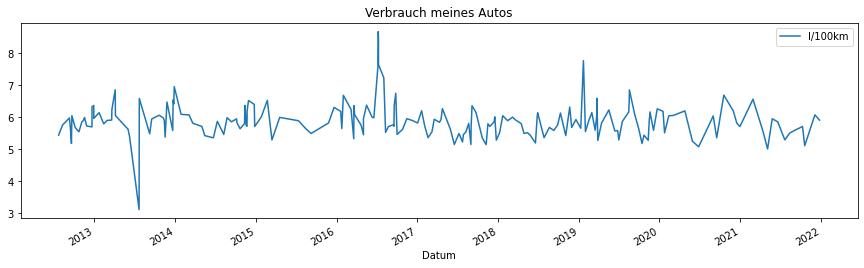

In [28]:
fuel_all.plot(x="Datum", y="l/100km", figsize=(15,4), title="Verbrauch meines Autos");
plt.show()

## Box-and-Whisker-Plots
Auf einen Blick sehen, wie die Daten verteilt sind.
Wer erinnert sich noch an `describe()`?

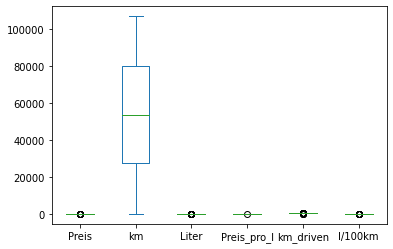

In [29]:
fuel_all.plot(kind="box");
plt.show()

Wenn sich die Werte in den Spalten voneinander unterscheiden ist es besser, wenn man die Daten einzeln visualisert:

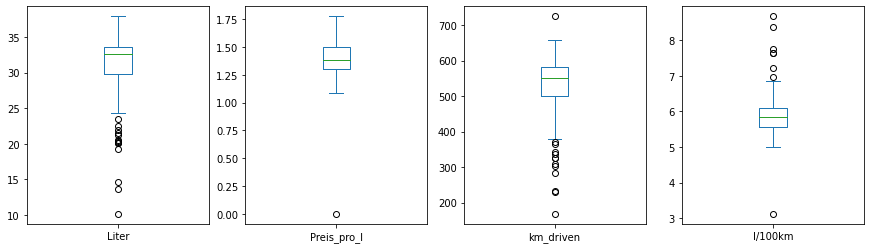

In [30]:
fuel_all[["Liter", "Preis_pro_l", "km_driven", "l/100km"]].plot(kind="box", subplots=True, figsize=(15,4));
plt.show()

## Bar-Charts

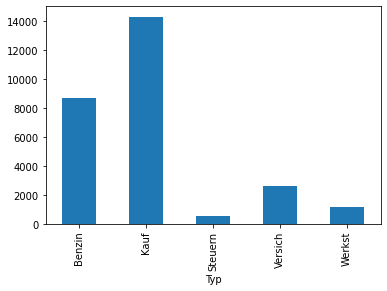

In [31]:
d.groupby("Typ")["Preis"].sum().plot(kind="bar");
plt.show()

## Pie-Charts

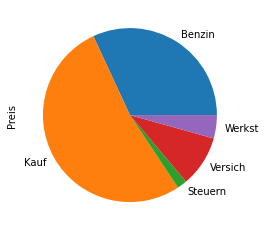

In [32]:
d.groupby("Typ")["Preis"].sum().plot(kind="pie");
plt.show()

## Grafiken speichern/exportieren

Zum speichern der Grafiken muss man sich zuerst mittels `get_figure()` einen Verweis auf die Grafik holen Danach kann man über diese Referenz die Grafik in verschiedenen Formaten speichern:
```
fig = d.groupby("Typ")["Preis"].sum().plot(kind="pie").get_figure();
fig.savefig('pie.png');
fig.savefig('pie.pdf');
```